In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
california = fetch_california_housing() # загрузка данных
type(california)

sklearn.utils._bunch.Bunch

In [4]:
# устроен как словарь, можно посмотреть ключи
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [5]:
type(california.data), type(california.target)

(numpy.ndarray, numpy.ndarray)

In [ ]:
california.data.shape, california.target.shape # размеры массивов

((20640, 8), (20640,))

In [ ]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [6]:
# объеденить массивы в дф
data = pd.DataFrame(california.data, columns = california.feature_names)
data['Price'] = california.target
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
data.info() # Проверим данные на наличие пропущенных значений

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
# основная статистика по датасету
data.describe().round(2) # число непропущенных значений, среднее, стандартное отклонение, минимум и максимум, медиану, 0.25 и 0.75 квартили

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,3.87,28.64,5.43,1.10,1425.48,3.07,35.63,-119.57,2.07
std,1.90,12.59,2.47,0.47,1132.46,10.39,2.14,2.00,1.15
min,0.50,1.00,0.85,0.33,3.00,0.69,32.54,-124.35,0.15
25%,2.56,18.00,4.44,1.01,787.00,2.43,33.93,-121.80,1.20
50%,3.53,29.00,5.23,1.05,1166.00,2.82,34.26,-118.49,1.80
75%,4.74,37.00,6.05,1.10,1725.00,3.28,37.71,-118.01,2.65
max,15.00,52.00,141.91,34.07,35682.00,1243.33,41.95,-114.31,5.00


In [7]:
y = data['Price'] # целевая переменная
X = data.drop('Price', axis=1) # дф факторов, по умолчанию используентся индекс строки, для удаления столбца axis=1
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [8]:
# обучение линейной модели

model = LinearRegression()
model.fit(X,y)
print(f'Коэффициенты модели: {[(k, v) for k, v in zip(X.columns, model.coef_)]}') # вектор коэффициентов без свободного
print(f'Свободный коэффициент: {model.intercept_}')

Коэффициенты модели: [('MedInc', 0.4366932931343245), ('HouseAge', 0.009435778033237972), ('AveRooms', -0.10732204139090447), ('AveBedrms', 0.645065693519812), ('Population', -3.976389421211576e-06), ('AveOccup', -0.003786542654971), ('Latitude', -0.42131437752714385), ('Longitude', -0.43451375467477743)]
Свободный коэффициент: -36.94192020718441


In [ ]:
y_pred = model.predict(X) # предсказание модели
y_pred[:5], y[:5]

(array([4.13164983, 3.97660644, 3.67657094, 3.2415985 , 2.41358744]),
 0    4.526
 1    3.585
 2    3.521
 3    3.413
 4    3.422
 Name: Price, dtype: float64)

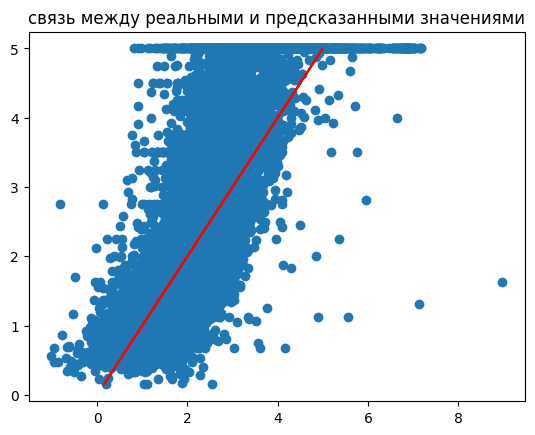

In [ ]:
plt.scatter(y_pred, y)
plt.plot(y, y, c='r')
plt.title('связь между реальными и предсказанными значениями')
plt.show()

In [ ]:
print('коэффициент детерминации:', model.score(X,y))

коэффициент детерминации: 0.606232685199805


коэффициент детерминации: 0.7460745292501869


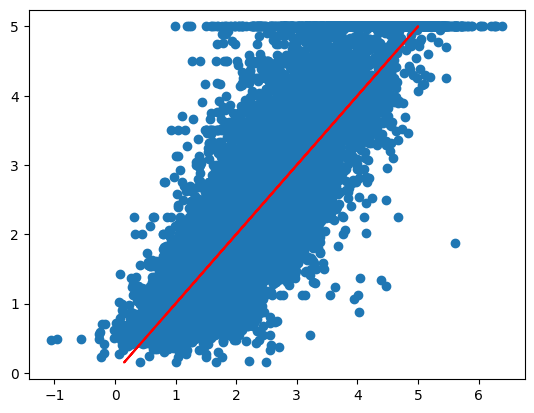

In [ ]:
# модель полиномиальной регрессии

poly = PolynomialFeatures(5).fit_transform(X) # полиномиальные признаки пятой степени
polynomial = LinearRegression() # новая модель
polynomial.fit(poly, y)
y_pred_poly = polynomial.predict(poly) # предсказание на полин. данных
print('коэффициент детерминации:', polynomial.score(poly,y))

plt.scatter(y_pred_poly, y)
plt.plot(y, y, c='r')
plt.show()

Метрика показывает, что вторая модель примерно на 14 процентных пунктов лучше, чем первая

### ДЗ

**1**. Какую еще информацию можно вывести для обученной модели? Попробуйте изменить аргументы при создании модели и посмотрите, как это влияет на качество предсказания.

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
print(f'коэффициенты: {polynomial.intercept_},{polynomial.coef_}\nсреднеквадратическуя ошибка: {np.sqrt(mean_squared_error(y,y_pred_poly))}\nсредняя абсолютная ошибкa: {mean_absolute_error(y_pred_poly,y)}')

коэффициенты: -8.813011822762226,[ 1.05816153e-08 -5.32836126e-08 -2.62561886e-10 ...  1.01975847e-08
  2.45618170e-10 -5.91946923e-10]
среднеквадратическуя ошибка: 0.5814761704277553
средняя абсолютная ошибкa: 0.4164426417208405


In [ ]:
# степень ниже
poly = PolynomialFeatures(2).fit_transform(X) # полиномиальные признаки 2 степени
polynomial = LinearRegression() # новая модель
polynomial.fit(poly, y)
y_pred_poly = polynomial.predict(poly)
print(f'коэффициент детерминации: {polynomial.score(poly,y)}\nкоэффициенты: {polynomial.intercept_},{polynomial.coef_}\nсреднеквадратическуя ошибка: {np.sqrt(mean_squared_error(y,y_pred_poly))}\nсредняя абсолютная ошибкa: {mean_absolute_error(y_pred_poly,y)}')

коэффициент детерминации: 0.6832976293317483
коэффициенты: 205.12326357685657,[ 5.91954220e-08 -1.12430252e+01 -8.48898541e-01  6.44105898e+00
 -3.15913288e+01  4.06090341e-04  1.00386234e+00  8.70568188e+00
  5.88063272e+00 -3.13081271e-02  1.85994682e-03  4.33020466e-02
 -1.86142277e-01  5.72831552e-05 -2.59019511e-03 -1.52505712e-01
 -1.44242939e-01  2.11725340e-04 -1.26219010e-03  1.06115057e-02
  2.81885305e-06 -1.81716947e-03 -1.00690371e-02 -9.99950165e-03
  7.26947734e-03 -6.89064344e-02 -6.82365913e-05  2.68878842e-02
  8.75089872e-02  8.22890338e-02  1.60180951e-01  5.14264273e-04
 -8.71911476e-02 -4.37042991e-01 -4.04150577e-01  2.73779932e-09
  1.91426762e-05  2.29529789e-05  1.46567733e-05  8.71560978e-05
  2.13344592e-02  1.62412938e-02  6.18867358e-02  1.08107173e-01
  3.99077351e-02]
среднеквадратическуя ошибка: 0.6493882788439673
средняя абсолютная ошибкa: 0.4614262254571655


2 Попробуйте применить к той же задаче другие модели регрессии. Для каждой из них выведите визуализацию регрессии и оценку точности. Рекомендуется исследовать следующие модели:**

In [12]:
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor

In [16]:
# Случайный лес
model=RandomForestRegressor()
model.fit(X, y)
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
r2, mse

(0.974409247764814, 0.03407537381808113)

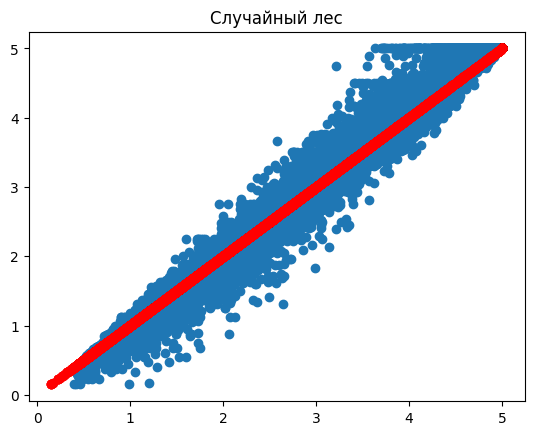

In [19]:
plt.scatter(y_pred, y)
plt.scatter(y, y, color='r')
plt.title('Случайный лес')
plt.show()

In [15]:
from sklearn.neighbors import KNeighborsRegressor

In [22]:
# Метод ближайших соседей
model_n = KNeighborsRegressor()
model_n.fit(X, y)
y_pred = model_n.predict(X)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
r2, mse

(0.4711185944964351, 0.7042321942059601)

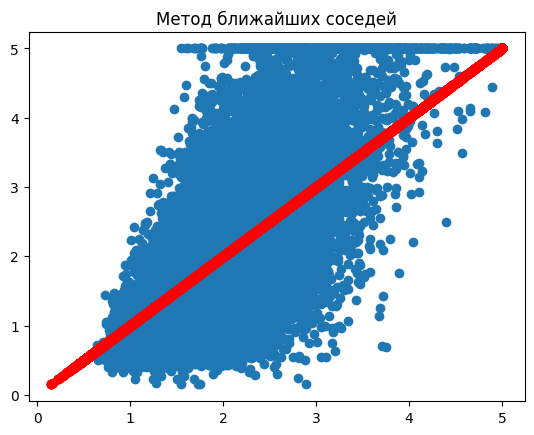

In [24]:
plt.scatter(y_pred, y)
plt.scatter(y, y, color='r')
plt.title('Метод ближайших соседей')
plt.show()

In [25]:
from sklearn.neural_network import MLPRegressor

In [26]:
# Многослойный перцептрон
model_p = MLPRegressor(max_iter=1000)
model_p.fit(X, y)
y_pred = model_p.predict(X)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
r2, mse

(0.42488798430390673, 0.7657905770807862)

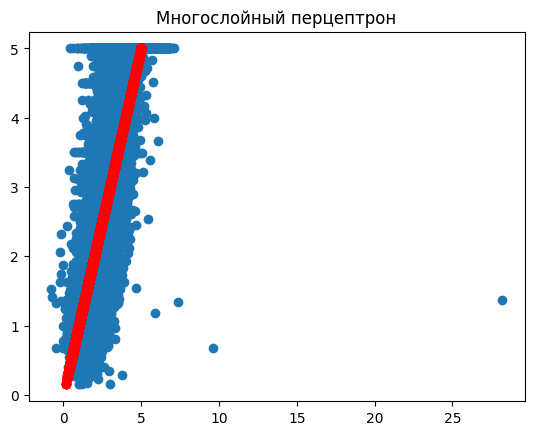

In [27]:
plt.scatter(y_pred, y)
plt.scatter(y, y, color='r')
plt.title('Многослойный перцептрон')
plt.show()

In [28]:
from sklearn.tree import DecisionTreeRegressor

# Дерево решений
model_t = DecisionTreeRegressor()
model_t.fit(X, y)
y_pred = model_t.predict(X)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
r2, mse

(1.0, 9.784321305066813e-32)

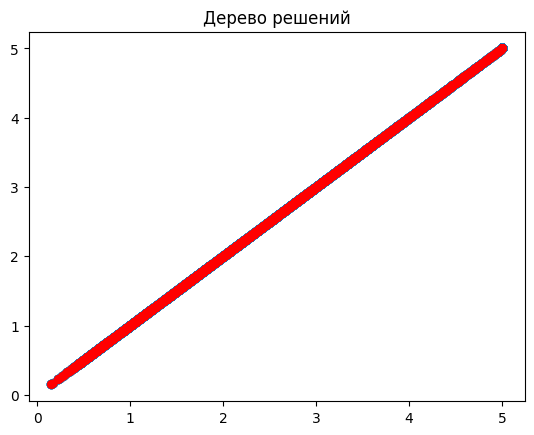

In [37]:
plt.scatter(y_pred, y)
plt.scatter(y, y, color='r')
plt.title('Дерево решений')
plt.show()

In [38]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

0.6062326586911464 0.5243210214822195


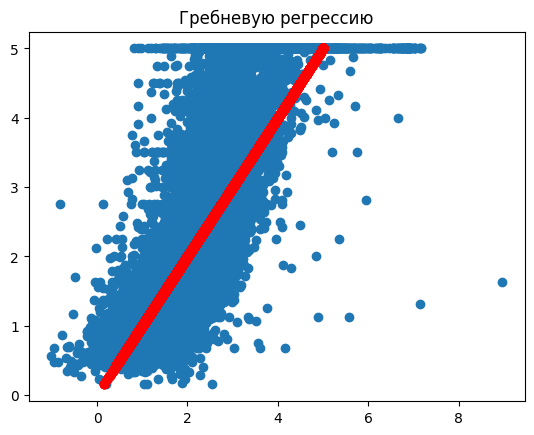

In [42]:
# Гребневую регрессию
model = Ridge()
model.fit(X, y)
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(r2, mse)

plt.scatter(y_pred, y)
plt.scatter(y, y, color='r')
plt.title('Гребневую регрессию')
plt.show()

0.28526231449198314 0.9517091796179765


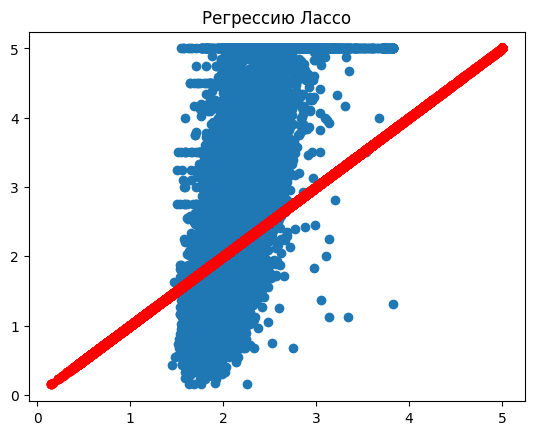

In [43]:
# Регрессию Лассо
model = Lasso()
model.fit(X, y)
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(r2, mse)

plt.scatter(y_pred, y)
plt.scatter(y, y, color='r')
plt.title('Регрессию Лассо')
plt.show()

0.4230627291195209 0.7682209961692811


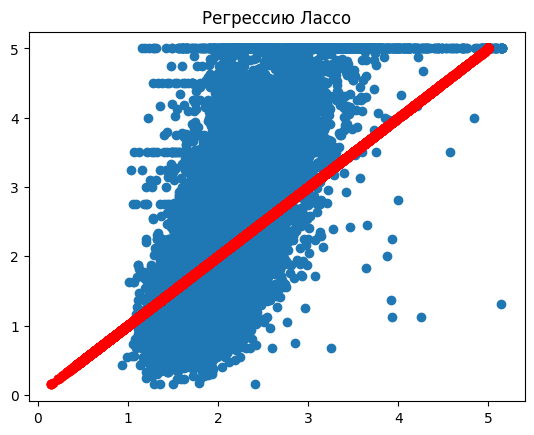

In [44]:
# Регрессию ElasticNet
model = ElasticNet()
model.fit(X, y)
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(r2, mse)

plt.scatter(y_pred, y)
plt.scatter(y, y, color='r')
plt.title('Регрессию ElasticNet')
plt.show()

0.9645246823957306 0.04723716980146234


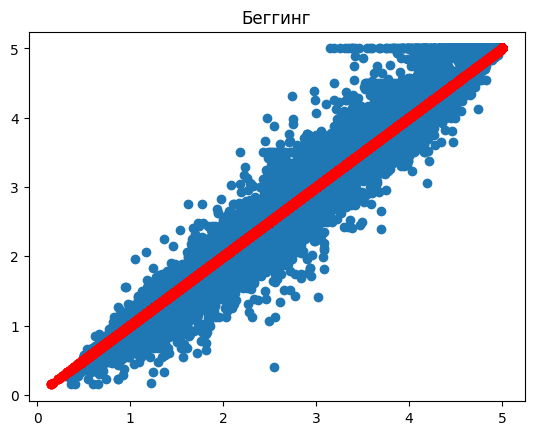

In [47]:
from sklearn.ensemble import BaggingRegressor

# Беггинг
model = BaggingRegressor()
model.fit(X, y)
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(r2, mse)

plt.scatter(y_pred, y)
plt.scatter(y, y, color='r')
plt.title('Беггинг')
plt.show()

3 Напишите функцию, которая автоматически обучает все перечисленные модели и для каждой выдает оценку точности.


K Nearest Neighbors: MSE:0.7042321942059601 R2:0.4711185944964351


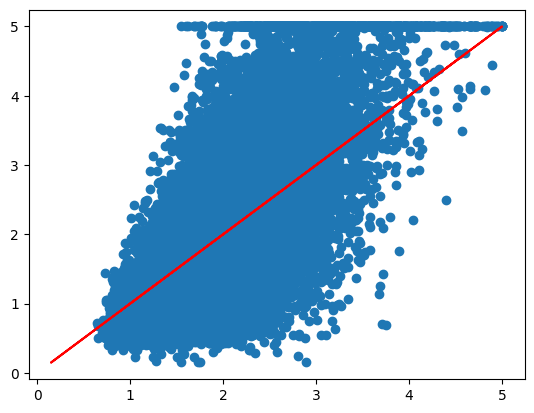

Multilayer Perceptron: MSE:1.3488301413541937 R2:-0.012977235085542382


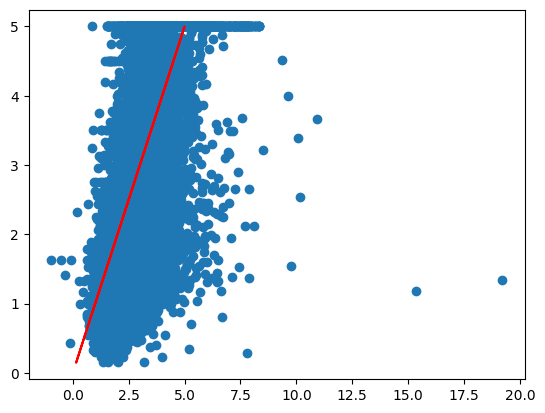

Decision Tree: MSE:9.990709332595566e-32 R2:1.0


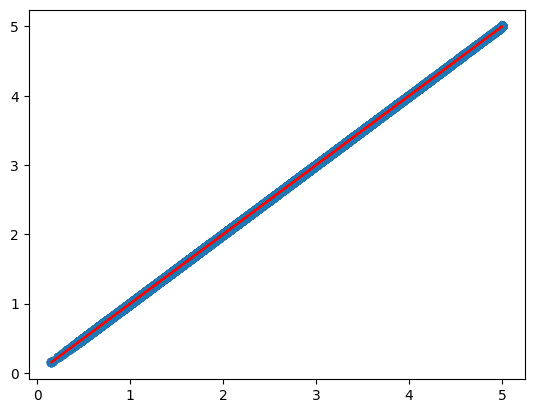

Random Forest: MSE:0.03440531642629758 R2:0.9741614594475448


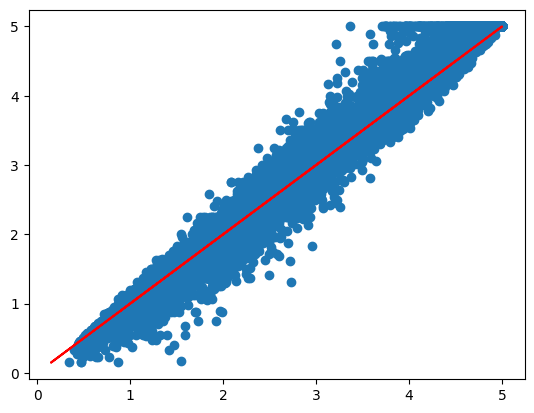

Bagging: MSE:0.04976619258380905 R2:0.9626253754133423


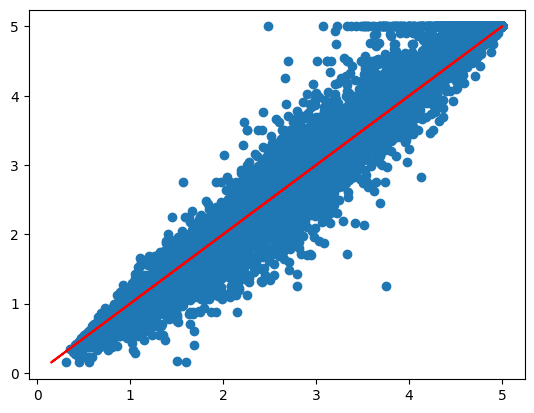

Ridge Regression: MSE:0.5243210214822195 R2:0.6062326586911464


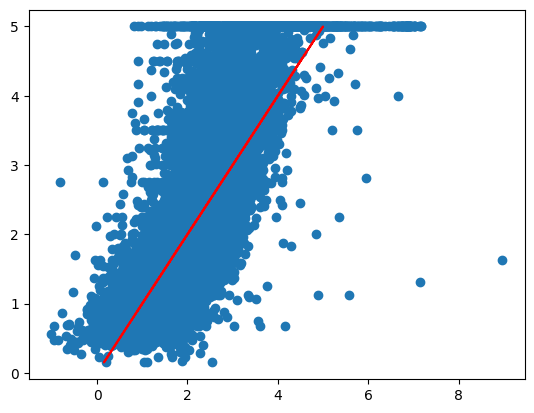

Lasso Regression: MSE:0.9517091796179765 R2:0.28526231449198314


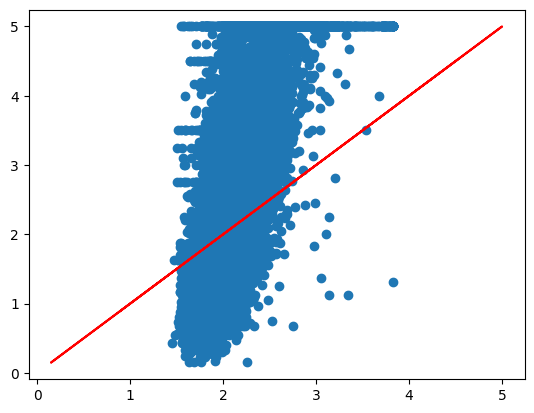

ElasticNet: MSE:0.7682209961692811 R2:0.4230627291195209


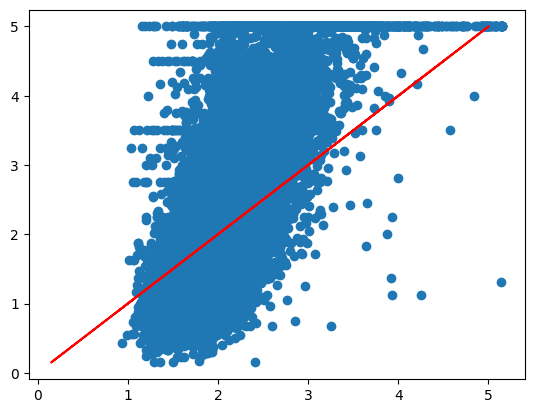

In [48]:
def evaluate(model,X,y):
    model.fit(X, y)
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    return mse,r2,y_pred

models = {
    #"SVR (Linear)": SVR(kernel='linear'),
    #"SVR (RBF)": SVR(kernel='rbf'),
    #"SVR (Poly)": SVR(kernel='poly'),
    "K Nearest Neighbors": KNeighborsRegressor(),
    "Multilayer Perceptron": MLPRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Bagging": BaggingRegressor(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet": ElasticNet()}

for name,model in models.items():
    mse,r2,y_pred=evaluate(model,X,y)
    res=f'{name}: MSE:{mse} R2:{r2}'
    print(res)
    plt.scatter(y_pred,y)
    plt.plot(y,y,color='r')
    plt.show()

4. Повторите полностью анализ для другого набора данных - встроенного в sklearn датасета diabetes.

In [50]:
from sklearn.datasets import load_diabetes

In [52]:
X, y = load_diabetes().data, load_diabetes().target

K Nearest Neighbors: MSE:2342.55592760181 R2:0.604957605699507


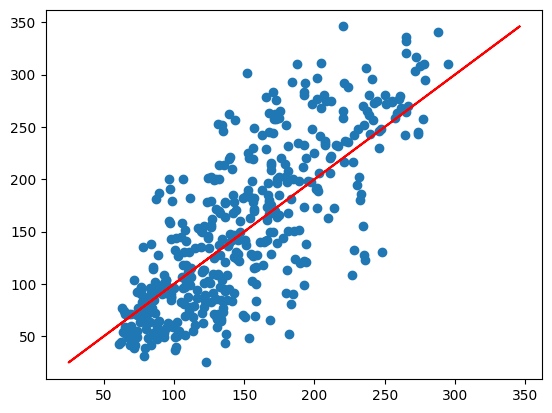

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Multilayer Perceptron: MSE:18808.256978216334 R2:-2.1717743776132825


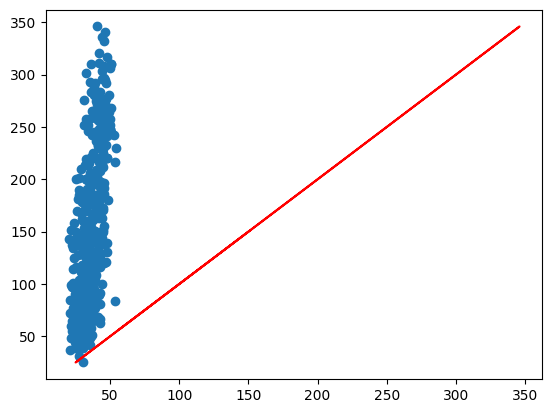

Decision Tree: MSE:0.0 R2:1.0


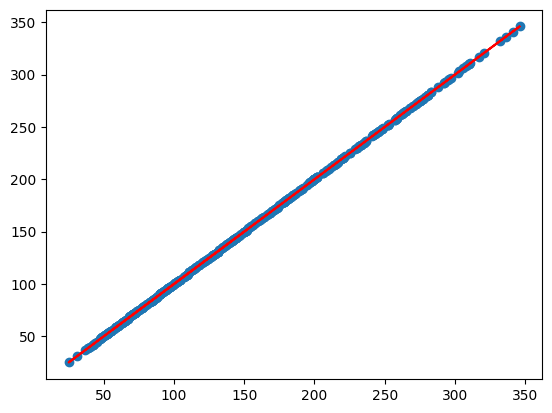

Random Forest: MSE:485.36211447963797 R2:0.9181498253477864


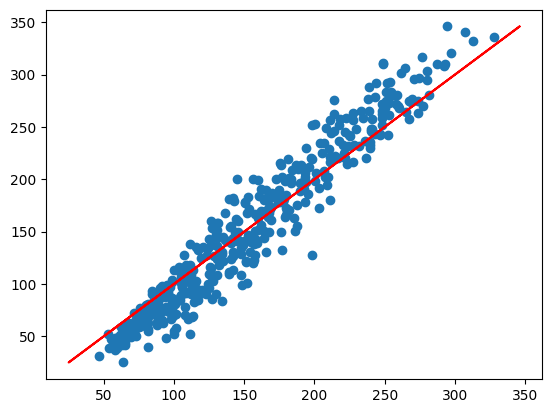

Bagging: MSE:678.9458144796381 R2:0.8855043856191229


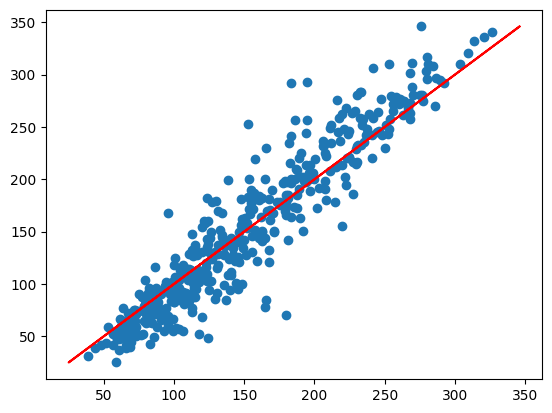

Ridge Regression: MSE:3254.1392124301146 R2:0.45123062774361744


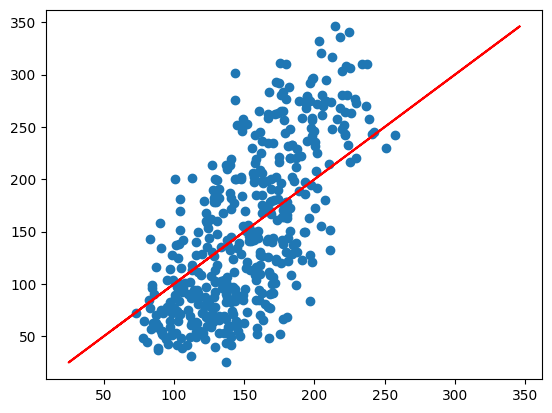

Lasso Regression: MSE:3810.6701145937627 R2:0.357378738231628


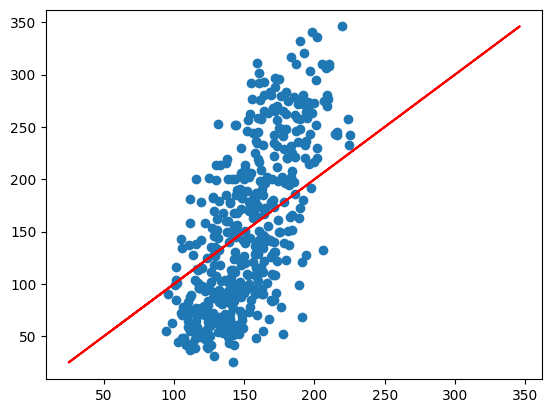

ElasticNet: MSE:5877.495852257372 R2:0.008834748998299613


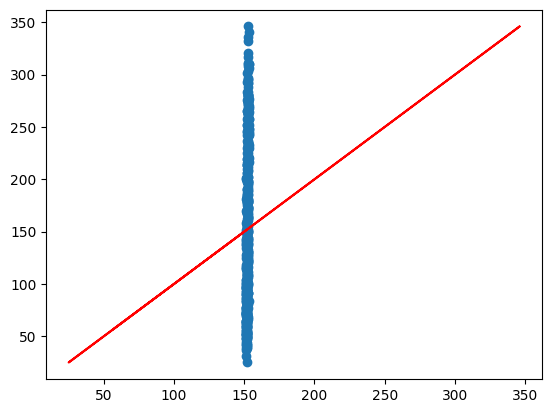

In [53]:
R2 = []

for name,model in models.items():
    mse,r2,y_pred=evaluate(model,X,y)
    res=f'{name}: MSE:{mse} R2:{r2}'
    print(res)
    plt.scatter(y_pred,y)
    plt.plot(y,y,color='r')
    plt.show()
    R2.append({name:r2})

In [55]:
for _ in R2:
  print(_)

{'K Nearest Neighbors': 0.604957605699507}
{'Multilayer Perceptron': -2.1717743776132825}
{'Decision Tree': 1.0}
{'Random Forest': 0.9181498253477864}
{'Bagging': 0.8855043856191229}
{'Ridge Regression': 0.45123062774361744}
{'Lasso Regression': 0.357378738231628}
{'ElasticNet': 0.008834748998299613}
